In [6]:
import pandas as pd

In [7]:
pwd

'/Users/hennytjoa'

In [3]:
ls

Applications/   Downloads/      Movies/         Public/         opt/
Desktop/        Dropbox/        Music/          Untitled.ipynb
Documents/      Library/        Pictures/       lab1-hennytjoa/


In [12]:
cd downloads

/Users/hennytjoa/Downloads


In [13]:
ls

). Serial murder by healthcare professionals
000010452732-104010460814 (1).pdf
000010452732-104010460814.pdf
00223891.2017.pdf
00782XXX1650-2018Dec24-2019Jan24.pdf
00782XXX1650-2019Feb22-2019Mar22.pdf
00782XXX1650-2019Jan24-2019Feb22.pdf
00782XXX1650-2019Mar22-2019Apr24.pdf
00782XXX1874-2018Dec24-2019Jan24.pdf
00782XXX1874-2019Apr24-2019May24 (1).pdf
00782XXX1874-2019Apr24-2019May24 (2).pdf
00782XXX1874-2019Apr24-2019May24.pdf
00782XXX1874-2019Dec24-2020Jan24.pdf
00782XXX1874-2019Feb22-2019Mar22 (1).pdf
00782XXX1874-2019Feb22-2019Mar22.pdf
00782XXX1874-2019Jan24-2019Feb22.pdf
00782XXX1874-2019Jul24-2019Aug23.pdf
00782XXX1874-2019Jun24-2019Jul24.pdf
00782XXX1874-2019Mar22-2019Apr24 (1).pdf
00782XXX1874-2019Mar22-2019Apr24 (2).pdf
00782XXX1874-2019Mar22-2019Apr24.pdf
00782XXX1874-2019May24-2019Jun24 (1).pdf
00782XXX1874-2019May24-2019Jun24.pdf
00782XXX1874-2019Nov22-2019Dec24.pdf
00782XXX1874-2020Apr24-2020May22.pdf
00782XXX1874-2020Aug24-2020Sep24.pdf
00782XXX1874-2020Feb24-2020Mar24.pd

In [48]:
data = pd.read_csv("Life expectancy.csv")

In [15]:
data.head()

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999


In [49]:
data.rename(columns={'Entity':'Country'}, inplace=True)
data.rename(columns={'Life expectancy':'LifeExp'}, inplace=True)
data


,Country,Year,LifeExp
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999
...,...,...,...
3248,United States,2012,78.940002
3249,United States,2013,78.959999
3250,United States,2014,78.940002
3251,United States,2015,78.870003


In [50]:
avg=(data.groupby(['Country', 'Year'], as_index=False).mean()
    .groupby('Country')['LifeExp'].mean())
avg


Country
Australia         54.290000
Brazil            42.392292
Canada            55.778533
China             41.452839
France            53.691717
Germany           52.880939
India             34.292578
Italy             49.226360
Japan             50.345707
Mexico            40.835629
Russia            41.992980
Spain             47.588779
Switzerland       55.246037
United Kingdom    55.591947
United States     54.651060
Name: LifeExp, dtype: float64

In [18]:
data.groupby('Country').LifeExp.transform('mean')

0       54.29000
1       54.29000
2       54.29000
3       54.29000
4       54.29000
          ...   
3248    54.65106
3249    54.65106
3250    54.65106
3251    54.65106
3252    54.65106
Name: LifeExp, Length: 3253, dtype: float64

In [51]:
data['LifeExpAvg']=data.groupby('Country').LifeExp.transform('mean')
data

,Country,Year,LifeExp,LifeExpAvg
0,Australia,1802,34.049999,54.29000
1,Australia,1803,34.049999,54.29000
2,Australia,1804,34.049999,54.29000
3,Australia,1805,34.049999,54.29000
4,Australia,1806,34.049999,54.29000
...,...,...,...,...
3248,United States,2012,78.940002,54.65106
3249,United States,2013,78.959999,54.65106
3250,United States,2014,78.940002,54.65106
3251,United States,2015,78.870003,54.65106


In [53]:
import numpy as np

In [54]:
(
    data.rename(columns={"LifeExp":"LifeExpectancy"})
    .assign(color_filter=lambda x:np.where((x.Year > 1800) & (x.LifeExpectancy > 0), 1, 0))
    .query("LifeExpectancy > 1 and color_filter == 1")
    .sort_values('Country', ascending=False)
    .reset_index(drop=True)
    .loc[:, ['Country', 'LifeExpectancy', 'Year', 'LifeExpAvg']]
)

,Country,LifeExpectancy,Year,LifeExpAvg
0,United States,78.860001,2016,54.65106
1,United States,39.410000,1868,54.65106
2,United States,39.410000,1879,54.65106
3,United States,39.410000,1878,54.65106
4,United States,39.410000,1877,54.65106
...,...,...,...,...
3234,Australia,66.400002,1943,54.29000
3235,Australia,65.879997,1942,54.29000
3236,Australia,66.139999,1941,54.29000
3237,Australia,66.260002,1940,54.29000


<AxesSubplot:xlabel='Country', ylabel='LifeExpAvg'>

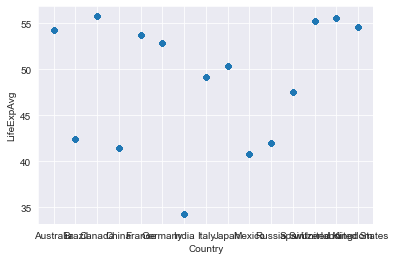

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data.plot(kind='scatter', x='Country', y='LifeExpAvg')

[Text(0.5, 1.0, 'Average Life Expectancy Age'), Text(0.5, 0, 'Countries')]

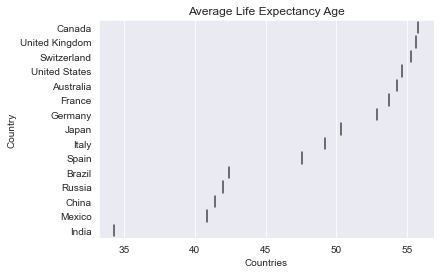

In [65]:
df7 = data.sort_values(by=["LifeExpAvg"],ascending = False)

types = sns.violinplot(x=df7["LifeExpAvg"],y=df7["Country"],data=data,scale="width").set(title='Average Life Expectancy Age',xlabel='Countries')

types


In [33]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

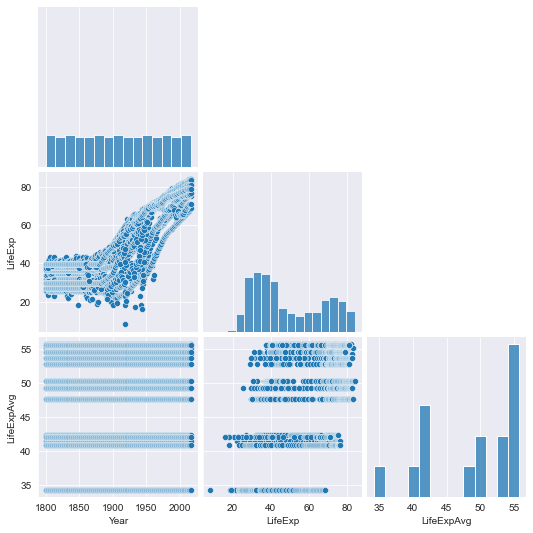

In [66]:
sns.pairplot(data=data,corner=True)

In [39]:

path= "C:/Users/hennytjoa/Downloads/Life expectancy.csv"

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

def load_and_process(path):
    df1 = (
            pd.read_csv(path)
            .rename(columns={"LifeExp":"LifeExpectancy"})
            .dropna()
            .sort_values("Country", ascending=True)
    )
    df2 = (
            df1
            .assign(color_filter=lambda x: np.where((x.Year > 1800) & (x.LifeExpectancy > 0), 1, 0))
    )
    
    return df2


In [ ]:
# Research Question: What can the dataset 

